In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Cancer_Hints_Project/

In [4]:
hints = pd.read_csv("../Data/HINTS_erdos.csv")

In [5]:
# Features of the dataset
hints.count()
print(hints.shape[0])

3630


In [6]:
hints =  hints.drop(['APP_REGION', 'PERSONID', 'HHID'], axis=1, inplace=False)

In [7]:
#set all the features with numerical values to integers  and character as categorical

# Convert numerical features to integers
numerical_features = hints.select_dtypes(include=['int64', 'float64']).columns
hints[numerical_features] = hints[numerical_features].astype('int32')

# Convert character features to categorical
character_features = hints.select_dtypes(include=['object']).columns
hints[character_features] = hints[character_features].astype('category')

In [8]:
#turn all values less than 0 to NA in integer type features
hints[numerical_features] = hints[numerical_features].applymap(lambda x: np.nan if x < 0 else x)
hints.head()

/var/folders/ht/2mt_8wkx0_b2lg5ypfn0dn500000gn/T/ipykernel_14573/1328079533.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  hints[numerical_features] = hints[numerical_features].applymap(lambda x: np.nan if x < 0 else x)


,Stratum,HIGHSPANLI,HISPSURNAME,HISP_HH,Treatment_C2,RUC2003,CENSDIV,CENSREG,FormType,Language_Flag,...,EducA,EducB,RaceEthn,HHInc,BMI,AgeDX,TimeSinceDX,smokeStat,PHQ4,IncomeRanges_IMP
0,HM,2,2,2,1,1,5,3,2,1,...,3.0,3.0,2.0,5.0,29.0,NaN,NaN,1.0,2.0,7.0
1,LM,2,2,2,1,6,2,1,2,1,...,2.0,2.0,2.0,NaN,27.0,NaN,NaN,2.0,1.0,4.0
2,HM,2,2,2,1,1,3,2,2,1,...,4.0,4.0,5.0,5.0,20.0,NaN,NaN,1.0,2.0,8.0
3,HM,2,2,2,1,1,5,3,2,1,...,4.0,5.0,3.0,5.0,22.0,NaN,NaN,3.0,1.0,9.0
4,HM,2,2,2,1,4,5,3,2,1,...,NaN,NaN,2.0,3.0,28.0,NaN,NaN,3.0,0.0,5.0


In [9]:
na_counts = hints.isna().sum()
features_to_remove = na_counts[na_counts > 2420] #hints.shape[0] = 3630, remove features with na.counts 2/3 of whole dataset
feature_names_to_remove = features_to_remove.index.tolist()  # Get the names of these features
print(feature_names_to_remove)
print(len(feature_names_to_remove))

['ConsiderQuit', 'DrWantedPSATest', 'CaBladder', 'CaBone', 'CaBreast', 'CaCervical', 'CaColon', 'CaEndometrial', 'CaHeadNeck', 'CaHodgkins', 'CaLeukemia', 'CaLiver', 'CaLung', 'CaMelanoma', 'CaNonHodgkin', 'CaOral', 'CaOvarian', 'CaPancreatic', 'CaPharyngeal', 'CaProstate', 'CaRectal', 'CaRenal', 'CaSkin', 'CaStomach', 'CaOther', 'Cancer_Cat', 'WhenDiagnosedCancer', 'UndergoCancerTreatment', 'CancerTx_Chemo', 'CancerTx_Radiation', 'CancerTx_Surgery', 'CancerTx_Other', 'HowLongFinishTreatment_Cat', 'CancerTxSummary', 'CancerCheckups', 'CancerDeniedCoverage', 'CancerHurtFinances', 'CancerClinicalTrial', 'DiscussedClinicalTrial', 'ReceivedCareVA', 'YearCameToUSA', 'SpeakEnglish', 'HHAdultGender3', 'HHAdultAge3', 'HHAdultMOB3', 'HHAdultGender4', 'HHAdultAge4', 'HHAdultMOB4', 'HHAdultGender5', 'HHAdultAge5', 'HHAdultMOB5', 'MailSurveyTime_Hrs', 'AgeDX', 'TimeSinceDX']
54


In [10]:
hints = hints.drop(columns=feature_names_to_remove, axis=1, inplace=False)

In [11]:
hints.shape

(3630, 300)

In [13]:
hints.to_csv("../Data/hints_filtered0.csv", index=False)

## **Data subset on "Cancer Attention Info + Demographic info"**


In [ ]:
#print(hints.columns.tolist())

In [14]:
#Sex, Ethnicity/Race , AgeGroup
Race = ['BornInUSA', 'NotHisp', 'Mexican', 'PuertoRican', 'Cuban', 'OthHisp', 'White', 'Black', 'AmerInd', 'AsInd', 'Chinese', 'Filipino', 'Japanese', 'Korean', 'Vietnamese', 'OthAsian', 'Hawaiian', 'Guamanian', 'Samoan', 'OthPacIsl']
hints_race = hints[Race].replace(2,0)  # 1 for yes, 0 for No instead

Gender = ['GenderC'] # ['SelfGender', 'SelfAge', 'SelfMOB', 'HHAdultGender2', 'HHAdultAge2', 'HHAdultMOB2']
hints_gender = hints[Gender].replace(2,0) # 1 for Male, 0 for Female

# use AgeGrp instead of Age
AgeGrp = ['AgeGrpB' ] # [ 'Age', 'AgeGrpA', 'AgeGrpB', 'EducA', 'EducB', 'RaceEthn']
# AgeGroup: 18-34:1, 35-39: 2, 40-64: 3, 65-74: 4 , 75+: 5
hints_agegrp = hints[AgeGrp]

# hints_agegrp = pd.get_dummies(hints.AgeGrpB, prefix='AgeGrp')

Other_demo = ['BMI','CENSDIV','EducA','HHInc']

# Cancer Info
cancer_info = ['CancerAttention_HealthNews','CancerAttention_Internet','CancerAttention_LocalTV','CancerAttention_NatTV','CancerAttention_OnlineNews','CancerAttention_PrintNews','InternetCancerInfoSelf','InternetCancerInfoSite']

hints_base = pd.DataFrame(hints, columns = Other_demo + cancer_info)



In [15]:
# Medical Conditions
MedicalConditions = (["GeneralHealth", "OwnAbilityTakeCareHealth", "MedConditions_Diabetes", "MedConditions_HighBP", "MedConditions_HeartCondition", "MedConditions_LungDisease", "MedConditions_Arthritis", "MedConditions_Depression"])#, "LittleInterest", "Hopeless", "Nervous", "Worrying", "EmotionalSupport", "TalkHealthFriends", "HelpDailyChores"])
hints_health = hints[MedicalConditions]


In [16]:
#Target variables:
target  = hints['EverHadCancer'].replace(2,0) # 1 for yes, 0 for no
hints_final = pd.concat([hints_race, hints_gender, hints_agegrp,hints_base,hints_health, target ], axis=1)

print(hints_final.shape)

(3630, 43)


In [17]:
# def categorize_age(age):
#     if age >= 18 and age <= 34:
#         return 1
#     elif age >= 35 and age <= 40: # had to do this to match AgeGrpB
#         return 2
#     elif age > 40 and age <= 64:
#         return 3
#     elif age >= 65 and age <= 74:
#         return 4
#     elif age >= 75:
#         return 5
#     else:
#         return None

# hints_try.loc[:, 'Age_category']  = hints_try.loc[:,'Age'].apply(categorize_age)
# print(hints_try)
# #Create one-hot encoding for AgeGroup
# age_dummies = pd.get_dummies(hints_try['Age_category'], prefix='Age_category')
# print(age_dummies)
# # Step 3: Concatenate the one-hot encoded columns with the original DataFrame
# # hint = pd.concat([hint, age_dummies], axis=1)
# # pd.get_dummies(hints[i]['age_category'], prefix='age_category')

### **Visualising And Removing NAs**

In [18]:
print(hints_final.isna().sum())

BornInUSA                        61
NotHisp                         351
Mexican                         351
PuertoRican                     351
Cuban                           351
OthHisp                         351
White                           227
Black                           227
AmerInd                         227
AsInd                           227
Chinese                         227
Filipino                        227
Japanese                        227
Korean                          227
Vietnamese                      227
OthAsian                        227
Hawaiian                        227
Guamanian                       227
Samoan                          227
OthPacIsl                       227
GenderC                          68
AgeGrpB                         119
BMI                             178
CENSDIV                           0
EducA                            89
HHInc                           480
CancerAttention_HealthNews      195
CancerAttention_Internet    

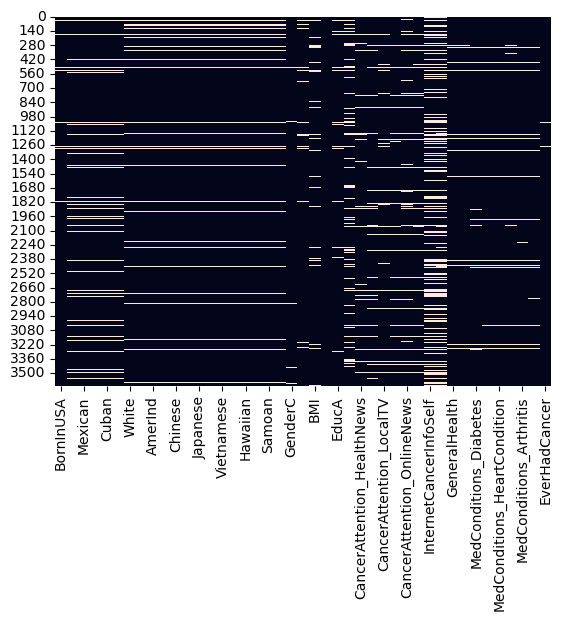

In [19]:
sns.heatmap(hints_final.isnull(), cbar=False)
plt.show()

**Removing the colums with high number of missing values**

In [20]:
na_counts = hints_final.isna().sum()
features_to_remove = na_counts[na_counts > 500] #hints.shape[0] = 3630, remove features with na.counts 2/3 of whole dataset
feature_names_to_remove = features_to_remove.index.tolist()  # Get the names of these features
print(feature_names_to_remove)

['InternetCancerInfoSelf', 'InternetCancerInfoSite']


In [21]:
hints_final = hints_final.drop(columns=feature_names_to_remove, axis=1, inplace=False)

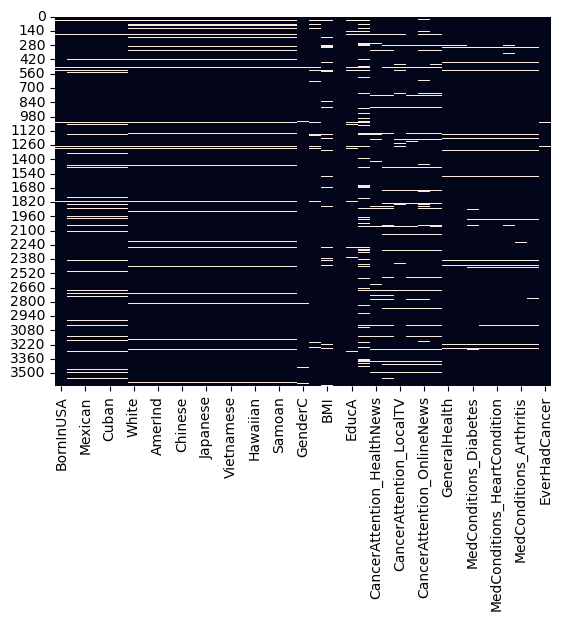

In [22]:
sns.heatmap(hints_final.isnull(), cbar=False)
plt.show()

In [23]:
hints_final = hints_final.dropna()
print(hints_final.shape)

(2422, 41)


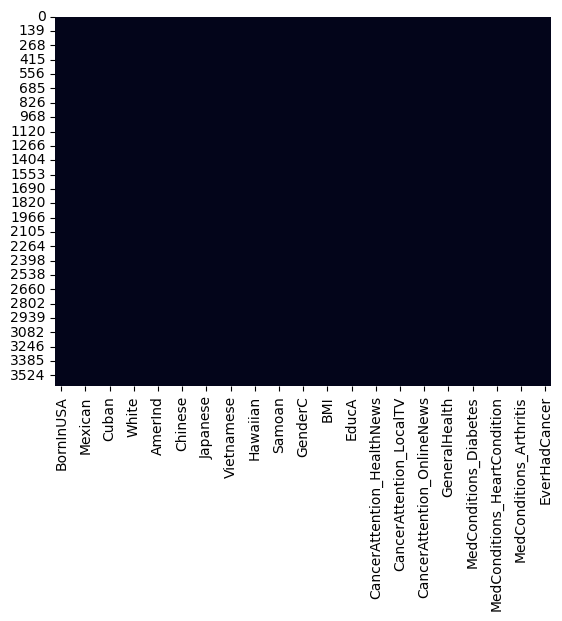

In [24]:
sns.heatmap(hints_final.isnull(), cbar=False)
plt.show()

In [25]:
cancer_counts = hints_final['EverHadCancer'].value_counts()
cancer_counts


EverHadCancer
0.0    2123
1.0     299
Name: count, dtype: int64

In [26]:
hints_final.head()

,BornInUSA,NotHisp,Mexican,PuertoRican,Cuban,OthHisp,White,Black,AmerInd,AsInd,...,CancerAttention_PrintNews,GeneralHealth,OwnAbilityTakeCareHealth,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Arthritis,MedConditions_Depression,EverHadCancer
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
8,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0


In [28]:
hints_final.to_csv("../Data/final_hints_dataset.csv", index=False)